

# Project 2 : TMDb movie data  analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
> ## Introduction:

> **In this project, I will be looking at the movie data set file (tmdb-movies.csv) which has records of movies details such as budgets, revenues, release dates, votings and other info. and then provide some overview analysis 
regarding the following Questions:**
> - **I will be looking at the hottest season (month) for movies release and budgets distribution over the year.**
> - **I will be investigating and analysing the top 100 profited movies distribution over the year.**
> - **as well as investigating the bottom 100 in terms of profit value (most loss-least profit) movies distribution over the year.**


In [92]:
#importing the relevant packages needed for our implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Here will be loading the data from the file provided, cheching them and then applying some operation to drop unnecessary columns, missing data as well as correcting data types to make the data st clean and ready for our analaysis.**


In [93]:
##loading the data from the file and checking out its data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [94]:
#getting an overview of the data shape&info plus value availability
df.shape

(10866, 21)

In [95]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


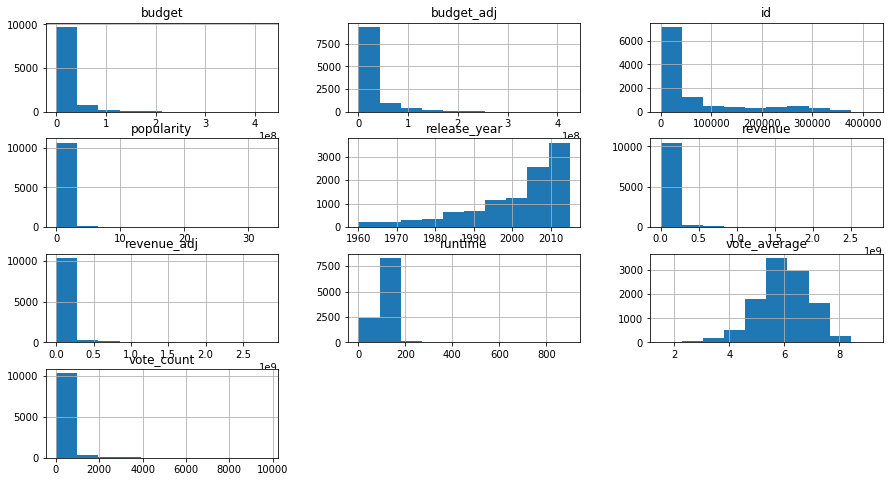

In [96]:
#getting an overview histogram of the dataframe
df.hist(figsize=(15,8));

In [97]:
#dropping unwanted & unecessary columns  for our anaalysis
df.drop(['popularity','id','budget','revenue','vote_average','vote_count','release_year','cast','overview','runtime','genres','director','tagline','keywords','production_companies','homepage','imdb_id'], axis=1, inplace=True)

In [98]:
df.head()

,original_title,release_date,budget_adj,revenue_adj
0,Jurassic World,6/9/15,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,5/13/15,1.379999e+08,3.481613e+08
2,Insurgent,3/18/15,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,12/15/15,1.839999e+08,1.902723e+09
4,Furious 7,4/1/15,1.747999e+08,1.385749e+09


## Data Cleaning 
**Here I will be performing further operation to clean the data that we will be working with and adusting, adding some columns.**



In [99]:
#correcting some data types to be more appropriate and readabale
#renaming some columns for better readability and visualization later

df['release_date'] = pd.to_datetime(df['release_date'])
#getting the month value of the date type (release date) and renaming it
df['release_date'] = df['release_date'].dt.month

df.rename(columns={'release_date':'Months'}, inplace=True)
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

df.rename(columns={'budget_adj':'Budget'}, inplace=True)
df.rename(columns={'revenue_adj':'Revenue'}, inplace=True)
df.rename(columns={'release_year':'Year'}, inplace=True)
df.rename(columns={'original_title':'Title'}, inplace=True)


In [100]:
df.head()

,Title,Months,Budget,Revenue
0,Jurassic World,6,137999939,1392445892
1,Mad Max: Fury Road,5,137999939,348161292
2,Insurgent,3,101199955,271619025
3,Star Wars: The Force Awakens,12,183999919,1902723129
4,Furious 7,4,174799923,1385748801


In [101]:
#checking for null values
df.isnull().sum()

Title      0
Months     0
Budget     0
Revenue    0
dtype: int64

In [102]:
#droping missing or misintered values for the budget and revenues as it cannot be zero
df = df.query('Budget > 0 and Revenue > 0')

In [103]:
#adding a profit column
df['profit'] = df.apply(lambda row: row['Revenue'] - row['Budget'], axis=1)

In [104]:
df.head()

,Title,Months,Budget,Revenue,profit
0,Jurassic World,6,137999939,1392445892,1254445953
1,Mad Max: Fury Road,5,137999939,348161292,210161353
2,Insurgent,3,101199955,271619025,170419070
3,Star Wars: The Force Awakens,12,183999919,1902723129,1718723210
4,Furious 7,4,174799923,1385748801,1210948878


In [105]:
df.describe()

,Months,Budget,Revenue,profit
count,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,7.041515,4.424778e+07,1.370649e+08,9.281716e+07
std,3.363417,4.480417e+07,2.161112e+08,1.940756e+08
min,1.000000,1.000000e+00,2.000000e+00,-4.139124e+08
25%,4.000000,1.309053e+07,1.835735e+07,-1.507958e+06
50%,7.000000,3.001611e+07,6.173068e+07,2.737064e+07
75%,10.000000,6.061307e+07,1.632577e+08,1.074548e+08
max,12.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 5 columns):
Title      3854 non-null object
Months     3854 non-null int64
Budget     3854 non-null int64
Revenue    3854 non-null int64
profit     3854 non-null int64
dtypes: int64(4), object(1)
memory usage: 180.7+ KB


> ## Cleaning phase steps summary:
> - dropping unwanted & unecessary columns  for our anaalysis:-
> (id,budget,revenue,vote_count,release_year,cast, overview,runtime,
> genres,director,tagline,keywords,production_companies,homepage,imdb_id)
> - correcting some data types to be more appropriate to deal with and readabale for these columns: budget_adj ,revenue_adj (int) type while (float) type for the vote_average.
> - renaming some columns for better readability and visualization later such as budget_adj to Budget , revenue_adj to Revenue, release_year to Year and original_title to Title.
> - getting the month value of the date type (release date) and renaming it to Months
> - droping missing or misintered values for the budget and revenues as it cannot be zero
> - Creating a profit column with the result of the operation (Revenue - Budget)

> **Tha dataframe are now clean and ready for more exploration**


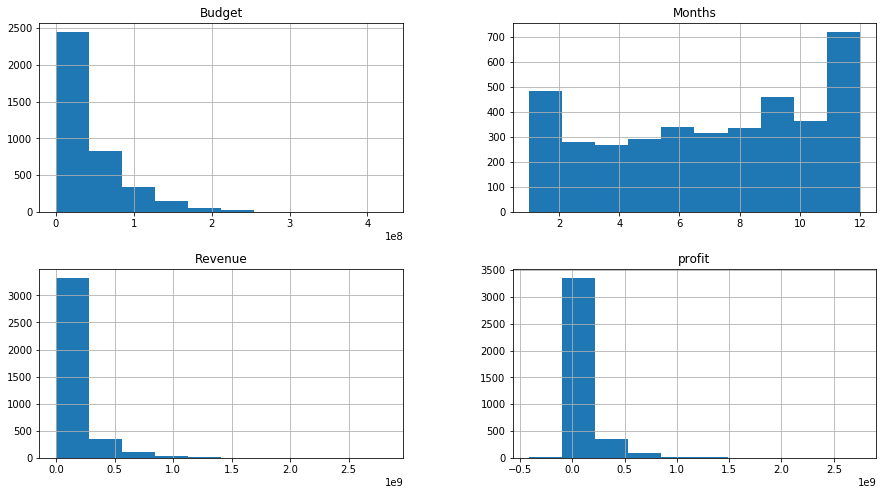

In [107]:
df.hist(figsize=(15,8));

**From the chart above we can see that December is the hottest month for releasing movies.**

<a id='eda'></a>
## Exploratory Data Analysis

> - **plotting to the visualize the hot season (month) & budget relation.**

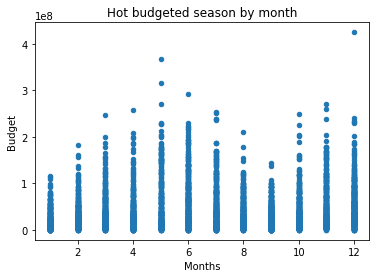

In [108]:
df.plot.scatter(x='Months',y='Budget',title='Hot budgeted season by month');

- we can see from the graph that the period 5-6 & 11-12 months are the hottest. That can be linked to summer and new years holidays wehre producers are puting most budgets and releasing most movies.
- very high competition within these months.

> - **plotting to visualize the top 100 & bottom 100 profit values and its relation with season's release.**


In [109]:
top100 = df.nlargest(100, 'profit')

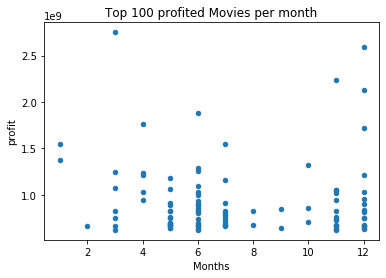

In [110]:
top100.plot.scatter(x='Months',y='profit',title='Top 100 profited Movies per month');

> - **the graph shows that most profited movies are released in the months 3-4-6-7 and 11-12-1.**
> - **again that's related to the size of production at these periods and funding put in them**

In [111]:
bottom100 = df.nsmallest(100, 'profit')

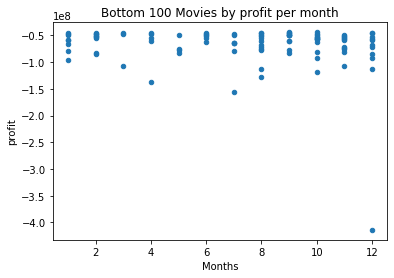

In [112]:
bottom100.plot.scatter(x='Months',y='profit',title='Bottom 100 Movies by profit per month');

> - **most losses appear to be between 8-12 which can be for low season AUG-SEP-OCT and probabley for the high competition in NOV-DEC moths**
> - **while the least losses are between Feb-Jun months because of the low production in the low season.**

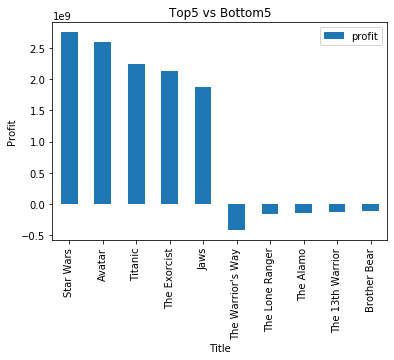

In [113]:
df2 = pd.concat([df.nlargest(5, 'profit'), df.nsmallest(5, 'profit')], ignore_index=True)
pt = df2.plot.bar(y='profit', x='Title', title='Top5 vs Bottom5')
pt.set_ylabel('Profit');

> - It's clear to see that "Star Wars" has made the biggest profit where as most loss was made by "The warior's way".
> - also it can be seen that the reward (profit) can be very high where as the loss isn't as high, specially the 2nd top to 5th losses have reltive and small loss margins where as probabley something has gone very wrong with the "The warior's way" movie.

<a id='conclusions'></a>
## Conclusions:
> **We can sum up our findings in the statements as follows:**
> - Most movie procutions (hot season) are on the public holidays (summer&New year).
> - The hot season means most profits & losses are around these times as that's where competition and budgets are at their highest (risk & reward).
> - The low season may provide opportunities and less risky (less competition) providing high quality productions and reasonable funding.**
> - there was a high volume of monetary values misinserted (zero values) which reduces the size of the data studied to less than 40%.
